<a href="https://colab.research.google.com/github/Hallowtipz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Jesse_Ghansah_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [111]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
#import dependencies
import pandas as pd

In [113]:
#load file from computer
from google.colab import files
uploaded = files.upload()

Saving haberman.data to haberman (4).data


In [114]:
#create the dataframe and do some cursory explorations
df = pd.read_csv("haberman (4).data")
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [115]:
df.shape

(305, 4)

In [116]:
df.tail()

,30,64,1,1.1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [118]:
#the count on the dataframe doesnt match the count in the dataset metadata
df.count()

30     305
64     305
1      305
1.1    305
dtype: int64

In [119]:
#fixed misaligned/false header
df = pd.read_csv("haberman.data", header = None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
#create a list with the proper column headers from the metadata
column_names = ['patient_age', 'year_of_operation', 'no_of_positive_nodes','survival_status']

In [121]:
#apply to dataframe to properly name the columns
df = pd.read_csv("haberman.data", names=column_names)
df.head()

,patient_age,year_of_operation,no_of_positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [122]:
df.sample(10)

,patient_age,year_of_operation,no_of_positive_nodes,survival_status
173,54,66,0,1
60,42,65,0,1
108,48,58,11,2
31,38,66,11,1
201,57,69,0,1
141,51,66,1,1
218,59,64,1,1
155,52,68,0,1
51,41,65,0,1
199,57,64,1,2


In [123]:
#check for missing values
df.isna().sum()

patient_age             0
year_of_operation       0
no_of_positive_nodes    0
survival_status         0
dtype: int64

In [124]:
df['survival_status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      2
8      2
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    2
282    1
283    1
284    1
285    2
286    2
287    1
288    1
289    1
290    1
291    1
292    1
293    2
294    1
295    1
296    1
297    1
298    1
299    2
300    1
301    1
302    1
303    1
304    2
305    2
Name: survival_status, Length: 306, dtype: int64

In [0]:
#import numpy for encoding
import numpy as np


In [0]:
#I created a function, that together with a cool numpy method (Vectorize) i recently read about, 'encoded' the survival status to 1, 0 

def conditions(x):
    if x == 2:
        return "0"
    elif x == 1:
        return "1"
    else:
        return

func = np.vectorize(conditions)
df['survival_status'] = func(df['survival_status'])



In [127]:
#encoding worked
df['survival_status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: survival_status, Length: 306, dtype: object

In [128]:
#final dataframe cleaned
df.head()

,patient_age,year_of_operation,no_of_positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [129]:
# TODO
df.head()


,patient_age,year_of_operation,no_of_positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [130]:
#did a crosstabulation to compare the survival status and patient's age
pd.crosstab(df['survival_status'], df['patient_age'])

patient_age,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,83
survival_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,0,0,1,1,0,3,2,4,3,3,4,3,3,2,2,2,4,6,4,2,2,3,0,1,2,3,3,1,0,4,2,2,0,1,2,0,1,0,1,0,0,0,1,1
1,3,2,2,5,2,2,6,9,5,3,7,7,7,4,6,3,8,4,8,10,4,10,5,9,8,5,8,7,7,4,6,4,7,5,6,3,4,2,3,5,1,3,2,1,1,1,1,0,0


In [131]:
#binned the ages for easy comparison
age_bins = pd.cut(df['patient_age'], 5)  
pd.crosstab(df['survival_status'], age_bins, normalize='columns')

patient_age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
survival_status,,,,,
0,0.093023,0.313131,0.28125,0.271186,0.333333
1,0.906977,0.686869,0.71875,0.728814,0.666667


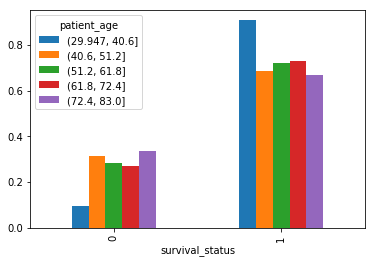

In [132]:
ct_0 = pd.crosstab(df['survival_status'], age_bins, normalize='columns')
ct_0.plot(kind='bar')

In [133]:
#compared the binned nodes and survival status
node_bins = pd.cut(df['no_of_positive_nodes'], 5)  
pd.crosstab(df['survival_status'], node_bins, normalize='columns')

no_of_positive_nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
survival_status,,,,,
0,0.218045,0.576923,0.545455,1.0,0.5
1,0.781955,0.423077,0.454545,0.0,0.5


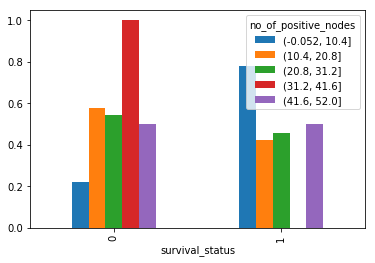

In [134]:
#plotting 
ct_1 = pd.crosstab(df['survival_status'], node_bins, normalize='columns')
ct_1.plot(kind='bar')

In [135]:
#compared survical status and operation year
pd.crosstab(df['survival_status'], df['year_of_operation'], normalize='columns')

year_of_operation,58,59,60,61,62,63,64,65,66,67,68,69
survival_status,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


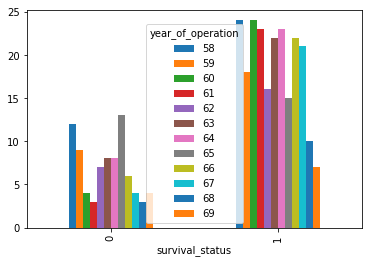

In [136]:
#plotting
ct_2 = pd.crosstab(df['survival_status'], df['year_of_operation'])
ct_2.plot(kind='bar')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [159]:
#make a copy of dataframe to avoid overwriting the previous work
df_copy = df
df_copy.head()

,patient_age,year_of_operation,no_of_positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# filtering dataframe by patients who survived
df_filtered_survived = df_copy[(df.survival_status == '1')] 






In [178]:
#new dataframe is smaller than original, so it worked
df_filtered_survived.shape


(225, 4)

In [179]:
df_filtered_survived.head()

,patient_age,year_of_operation,no_of_positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


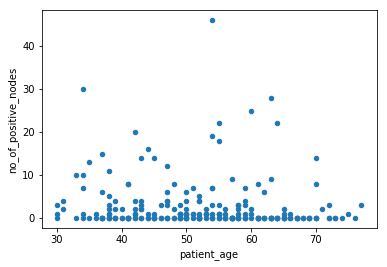

In [184]:
#plotting the graph to show the differences in Age and Number of Positive Axillary Nodes Detected
import matplotlib.pyplot as plt
df_filtered_survived.plot.scatter('patient_age', 'no_of_positive_nodes')


In [0]:
# filtering dataframe by patients who did not survive
df_filtered_died = df_copy[(df.survival_status == '0')] 




In [181]:
#new dataframe is smaller than original, so it worked
df_filtered_died.shape

(81, 4)

In [182]:
df_filtered_died.head()

,patient_age,year_of_operation,no_of_positive_nodes,survival_status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


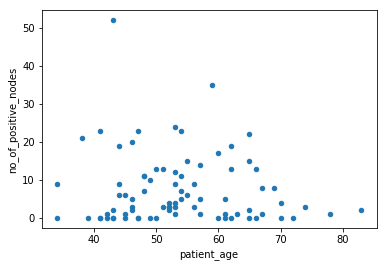

In [185]:
#plotting the graph to show the differences in Age and Number of Positive Axillary Nodes Detected
df_filtered_died.plot.scatter('patient_age', 'no_of_positive_nodes')


## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

1. Year of operation seems to have a positive correllation with survival

2. Patient age seems to have a negative correllation with survival

3. They seem to be directly correllated. 




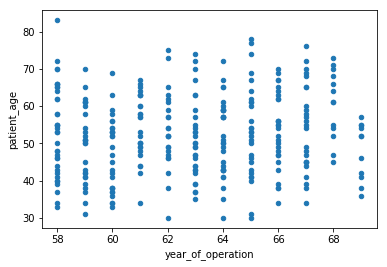

In [196]:
# Any Supplemental Code for Analysis Here


#feature_correlation = pd.crosstab(df['year_of_operation'], age_bins, normalize='columns')

df.plot.scatter('year_of_operation', 'patient_age')

